In [2]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize

def count_words(address):
    stop_word_list = ["apr", "gmt", "one", "two", "date", "subject", "would", "anyone", "des", "n", "get", "use", "uunet"]
    f = open(address, "r")
    EXAMPLE_TEXT = f.read()

    #nltk.download('stopwords')
    words_in_quote = word_tokenize(EXAMPLE_TEXT)
    #print(len(words_in_quote))
    words_in_quote

    stop_words = set(stopwords.words("english"))
    filtered_list = []
    for word in words_in_quote:
        if word.casefold() not in stop_words:
            filtered_list.append(word)

    filtered_list = [word for word in words_in_quote if word.casefold() not in stop_words]
    #print(len(filtered_list))
    filtered_list

    my_dict = {}
    for word in filtered_list:
        word_regex = re.compile(r"[^A-Za-z\s]")
        if word_regex.search(word) == None:
            if word.lower() not in stop_word_list:
                if word.lower() in my_dict.keys():
                    count = my_dict[word.lower()]
                    my_dict.update({word.lower(): count + 1})
                else:
                    my_dict.update({word.lower(): 1})
    return my_dict

                    
Class_1 = []
Class_2 = []
Class_3 = []
Class_4 = []
Class_5 = []
Class_6 = []

for i in range(1, 7):
    print(str(i) + "  --------------------------------------------")
    word_dict = count_words("Data Set\\" + str(i) + "\Train\\All_" + str(i) + ".txt")
    word_dict = {k: v for k, v in sorted(word_dict.items(), key = lambda item: item[1])}
    for j in range(1, 21):
        print('\t' + str(j) + '- ' + list(word_dict.keys())[len(word_dict) - j] , list(word_dict.values())[len(word_dict) - j])
        if i == 1:
            Class_1.append(list(word_dict.keys())[len(word_dict) - j])
        if i == 2:
            Class_2.append(list(word_dict.keys())[len(word_dict) - j])
        if i == 3:
            Class_3.append(list(word_dict.keys())[len(word_dict) - j])
        if i == 4:
            Class_4.append(list(word_dict.keys())[len(word_dict) - j])
        if i == 5:
            Class_5.append(list(word_dict.keys())[len(word_dict) - j])
        if i == 6:
            Class_6.append(list(word_dict.keys())[len(word_dict) - j])

1  --------------------------------------------
	1- lines 110
	2- path 105
	3- newsgroups 98
	4- organization 97
	5- graphics 73
	6- news 54
	7- university 54
	8- sender 47
	9- references 47
	10- computer 43
	11- polygon 41
	12- line 41
	13- know 38
	14- systems 35
	15- software 34
	16- point 34
	17- points 34
	18- thanks 33
	19- please 32
	20- writes 32
2  --------------------------------------------
	1- newsgroups 100
	2- path 99
	3- lines 98
	4- organization 97
	5- sale 89
	6- university 57
	7- sender 51
	8- rochester 44
	9- news 43
	10- new 42
	11- xref 42
	12- usenet 41
	13- shipping 38
	14- distribution 37
	15- usa 33
	16- computer 32
	17- ogicse 32
	18- offer 30
	19- condition 28
	20- asking 28
3  --------------------------------------------
	1- car 139
	2- newsgroups 103
	3- lines 102
	4- organization 100
	5- path 99
	6- writes 76
	7- references 71
	8- article 67
	9- news 58
	10- cars 53
	11- sender 51
	12- like 46
	13- rochester 40
	14- dealer 38
	15- university 37
	16- ogicse

In [3]:
import csv

word_list = [list(Class_1), list(Class_2), list(Class_3), list(Class_4), list(Class_5), list(Class_6)]
tmp_list = np.array(word_list).T.tolist()
fields = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'] 
with open('most_word.csv', 'w') as f:
    write = csv.writer(f)      
    write.writerow(fields)
    write.writerows(tmp_list)

In [4]:
import pandas as pd
df = pd.read_csv('most_word.csv')
df

,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6
0,lines,newsgroups,car,encryption,christian,gun
1,path,path,newsgroups,key,god,people
2,newsgroups,lines,lines,government,jesus,lines
3,organization,organization,organization,clipper,people,newsgroups
4,graphics,sale,path,chip,approved,organization
5,news,university,writes,security,newsgroups,path
6,university,sender,references,technology,lines,guns
7,sender,rochester,article,newsgroups,sender,like
8,references,news,news,keys,path,firearms
9,computer,new,cars,privacy,hedrick,article


In [5]:
result = []
for i in range(1,7):
    result_of_test = []
    for j in range(1,16):
        word_dict = count_words("Data Set\\" + str(i) + "\Test\\" + str(j) + ".txt")
        test_set = set(word_dict.keys())
        compare_dict = {}
        subscription_set = test_set & set(Class_1)
        compare_dict.update({1 : len(subscription_set)})
        subscription_set = test_set & set(Class_2)
        compare_dict.update({2 : len(subscription_set)})
        subscription_set = test_set & set(Class_3)
        compare_dict.update({3 : len(subscription_set)})
        subscription_set = test_set & set(Class_4)
        compare_dict.update({4 : len(subscription_set)})
        subscription_set = test_set & set(Class_5)
        compare_dict.update({5 : len(subscription_set)})
        subscription_set = test_set & set(Class_6)
        compare_dict.update({6 : len(subscription_set)})
        compare_dict = {k: v for k, v in sorted(compare_dict.items(), key = lambda item: item[1])}
        if (list(compare_dict.values())[len(compare_dict) - 1] == list(compare_dict.values())[len(compare_dict) - 2] 
            and list(compare_dict.keys())[len(compare_dict) - 1] != i):
            result_of_test.append(list(compare_dict.keys())[len(compare_dict) - 2])
        else:
            result_of_test.append(list(compare_dict.keys())[len(compare_dict) - 1])
        print("Folder " + str(i) + " File " + str(j) + " -> " + str(list(compare_dict.keys())[len(compare_dict) - 1]) + ", " + str(list(compare_dict.keys())[len(compare_dict) - 2]))
    result.append(result_of_test)    
    print("--------------------------------------")

CM = []
for i in range(6):
    sub_list = []
    for j in range(1, 7):
        counter = 0
        for k in range(15):
            if result[i][k] == j: 
                counter += 1
        sub_list.append(counter)
    CM.append(sub_list)

Folder 1 File 1 -> 1, 3
Folder 1 File 2 -> 3, 1
Folder 1 File 3 -> 3, 6
Folder 1 File 4 -> 1, 6
Folder 1 File 5 -> 1, 6
Folder 1 File 6 -> 1, 6
Folder 1 File 7 -> 1, 6
Folder 1 File 8 -> 3, 2
Folder 1 File 9 -> 2, 1
Folder 1 File 10 -> 1, 4
Folder 1 File 11 -> 3, 1
Folder 1 File 12 -> 1, 3
Folder 1 File 13 -> 1, 3
Folder 1 File 14 -> 3, 1
Folder 1 File 15 -> 1, 4
--------------------------------------
Folder 2 File 1 -> 2, 3
Folder 2 File 2 -> 2, 3
Folder 2 File 3 -> 2, 6
Folder 2 File 4 -> 2, 3
Folder 2 File 5 -> 2, 3
Folder 2 File 6 -> 2, 3
Folder 2 File 7 -> 1, 5
Folder 2 File 8 -> 3, 1
Folder 2 File 9 -> 2, 3
Folder 2 File 10 -> 2, 6
Folder 2 File 11 -> 2, 1
Folder 2 File 12 -> 3, 2
Folder 2 File 13 -> 2, 3
Folder 2 File 14 -> 2, 3
Folder 2 File 15 -> 2, 3
--------------------------------------
Folder 3 File 1 -> 3, 6
Folder 3 File 2 -> 3, 1
Folder 3 File 3 -> 2, 3
Folder 3 File 4 -> 2, 3
Folder 3 File 5 -> 3, 6
Folder 3 File 6 -> 3, 6
Folder 3 File 7 -> 3, 2
Folder 3 File 8 -> 3, 

Text(69.0, 0.5, 'Truth')

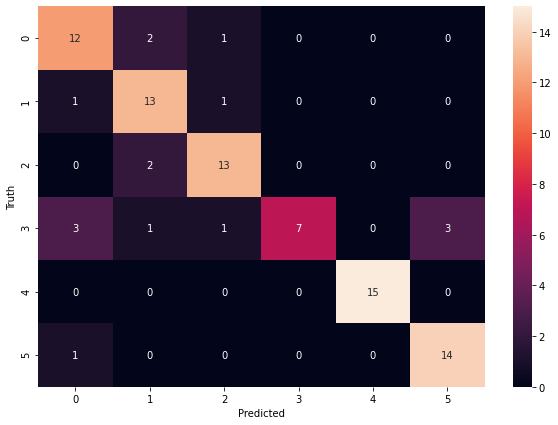

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt
#print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(CM, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')